In [5]:
import matplotlib.pyplot as plt
import numpy as np
import mxnet as mx
from mxnet import gluon, nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv.data.transforms import video
from gluoncv import utils
from gluoncv.model_zoo import get_model

148KB [00:00, 29600.73KB/s]            


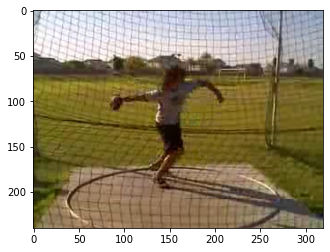

In [6]:
url = 'https://github.com/bryanyzhu/tiny-ucf101/raw/master/ThrowDiscus.png'
im_fname = utils.download(url)

img = image.imread(im_fname)

plt.imshow(img.asnumpy())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


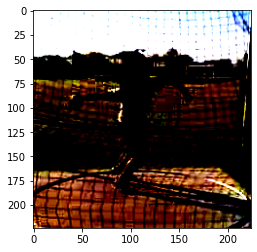

In [8]:
transform_fn = transforms.Compose([
    video.VideoCenterCrop(size=224),
    video.VideoToTensor(),
    video.VideoNormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
img_list = transform_fn([img.asnumpy()])
plt.imshow(np.transpose(img_list[0], (1,2,0)))
plt.show()

In [18]:
net = get_model('vgg16_ucf101', nclass=101, pretrained=True)

In [10]:
pred = net(nd.array(img_list[0]).expand_dims(axis=0))

classes = net.classes
topK = 5
ind = nd.topk(pred, k=topK)[0].astype('int')
print('The input video frame is classified to be')
for i in range(topK):
    print('\t[%s], with probability %.3f.'%
          (classes[ind[i].asscalar()], nd.softmax(pred)[0][ind[i]].asscalar()))

The input video frame is classified to be
	[ThrowDiscus], with probability 0.998.
	[HorseRace], with probability 0.001.
	[VolleyballSpiking], with probability 0.001.
	[Hammering], with probability 0.000.
	[TennisSwing], with probability 0.000.


In [16]:
from gluoncv.utils import try_import_cv2
cv2 = try_import_cv2()

url = 'https://github.com/bryanyzhu/tiny-ucf101/raw/master/v_Basketball_g01_c01.avi'
video_fname = utils.download(url)

cap = cv2.VideoCapture(video_fname)
cnt = 0
video_frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    cnt += 1
    if ret and cnt % 25 == 0:
        video_frames.append(frame)
    if not ret: break

cap.release()
print('We evenly extract %d frames from the video %s.' % (len(video_frames), video_fname))

282KB [00:00, 17068.22KB/s]            


We evenly extract 5 frames from the video v_Basketball_g01_c01.avi.


In [19]:
if video_frames:
    video_frames_transformed = transform_fn(video_frames)
    final_pred = 0
    for _, frame_img in enumerate(video_frames_transformed):
        pred = net(nd.array(frame_img).expand_dims(axis=0))
        final_pred += pred
    final_pred /= len(video_frames)

    classes = net.classes
    topK = 5
    ind = nd.topk(final_pred, k=topK)[0].astype('int')
    print('The input video is classified to be')
    for i in range(topK):
        print('\t[%s], with probability %.3f.'%
              (classes[ind[i].asscalar()], nd.softmax(final_pred)[0][ind[i]].asscalar()))

The input video is classified to be
	[Basketball], with probability 0.978.
	[TennisSwing], with probability 0.020.
	[SoccerJuggling], with probability 0.002.
	[VolleyballSpiking], with probability 0.000.
	[JavelinThrow], with probability 0.000.
